# TEXT ANALYSIS using NAIVE BAYES Classifier

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punct')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punct: Package 'punct' not found in index


In [2]:
df = pd.read_csv('IMDB_Dataset.csv')

In [3]:
df.shape

(50000, 2)

In [4]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [4]:
def stripHTML(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [14]:
stripHTML("<H1>Hi ..this is HTML tags </H1>")

'Hi ..this is HTML tags '

In [12]:
def removeSqBkts(text):
    return re.sub('\[[^]]*\]', '', text)

In [13]:
removeSqBkts('This is a sample [text] with [square brackets] containing some information.')

'This is a sample  with  containing some information.'

In [8]:
def denoiseText(text):
    text = stripHTML(text)
    text = removeSqBkts(text)
    return text

In [9]:
df['review'] = df['review'].apply(denoiseText)

C:\Users\hp\anaconda4\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [10]:
def removeSplCh(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

In [11]:
df['review'] = df['review'].apply(removeSplCh)

In [12]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show was an amazing fresh innovative ide...,negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [13]:
def myStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [14]:
df['review'] = df['review'].apply(myStemmer)

In [15]:
stopwordList = nltk.corpus.stopwords.words('english')
print(stopwordList)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
stop = set(stopwords.words('english'))

In [17]:
def removeStopWords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filteredTokens = [token for token in tokens if token.lower() not in stopwordList]
    filteredText = ' '.join(filteredTokens)
    return filteredText

In [18]:
df['review'] = df['review'].apply(removeStopWords)

In [19]:
xTrain, xTest, yTrain, yTest = train_test_split(df.review, df.sentiment, test_size= 0.25)

In [20]:
xTrain.shape

(37500,)

In [21]:
xTest.shape

(12500,)

In [22]:
yTrain.shape

(37500,)

In [23]:
yTest.shape

(12500,)

<function matplotlib.pyplot.show(close=None, block=None)>

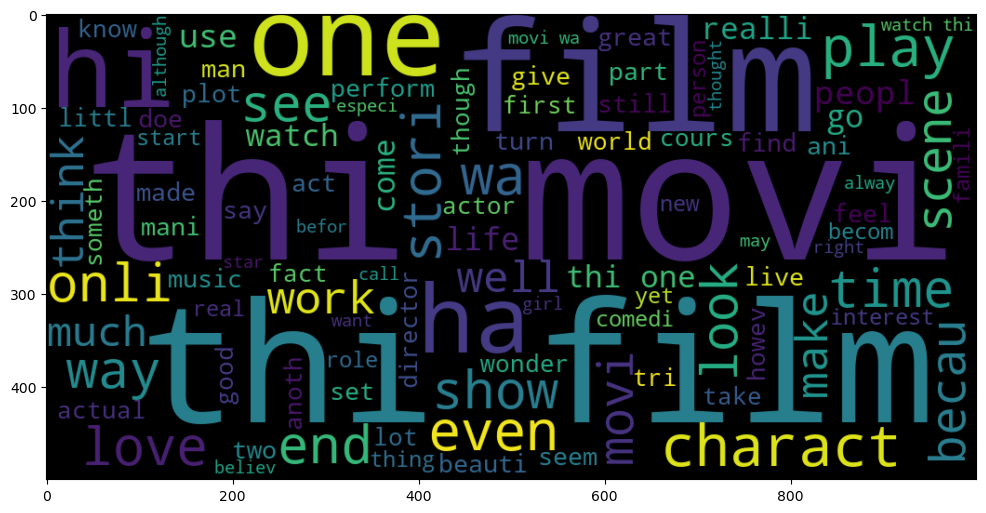

In [24]:
plt.figure(figsize= (12, 12))
dfPosReview = df[df['sentiment'] == 'positive']
posText = ' '.join(review for review in dfPosReview.review)
WC = WordCloud(width = 1000, 
               height = 500,
              max_words= 100)
posWords = WC.generate(posText)
plt.imshow(posWords,
          interpolation= 'bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

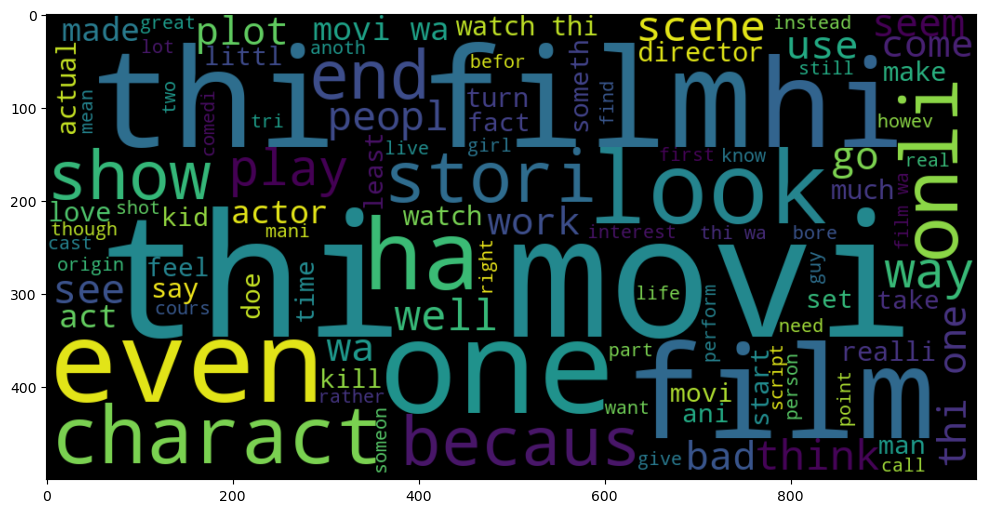

In [25]:
plt.figure(figsize= (12, 12))
dfNegReview = df[df['sentiment'] == 'negative']
negText = ' '.join(review for review in dfNegReview.review)
WC = WordCloud(width = 1000, 
               height = 500,
              max_words= 100)
negWords = WC.generate(negText)
plt.imshow(negWords,
          interpolation= 'bilinear')
plt.show

In [24]:
cv = CountVectorizer(min_df= 0,
                    max_df= 1,
                    binary= False,
                    ngram_range= (1, 3))

cvTrainReviews = cv.fit_transform(xTrain)
cvTestReviews = cv.transform(xTest)

In [25]:
cvTrainReviews.shape

(37500, 5860587)

In [26]:
cvTestReviews.shape

(12500, 5860587)

In [27]:
tf = TfidfVectorizer(min_df=0,
                    max_df=1,
                    use_idf= True,
                    ngram_range= (1, 3))
tfTrainReviews = tf.fit_transform(xTrain)
tfTestReviews = tf.transform(xTest)

In [28]:
tfTrainReviews.shape

(37500, 5860587)

In [29]:
tfTestReviews.shape

(12500, 5860587)

In [30]:
mnb = MultinomialNB()
mnbCV = mnb.fit(cvTrainReviews, yTrain)
mnbTFIDF = mnb.fit(tfTrainReviews, yTrain)

In [31]:
mnbCV

MultinomialNB()

In [32]:
mnbTFIDF

MultinomialNB()

In [33]:
cvPredicted = mnb.predict(cvTestReviews)

In [34]:
tfidfPredicted = mnb.predict(tfTestReviews)

In [35]:
cvPredicted

array(['negative', 'negative', 'negative', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

In [36]:
tfidfPredicted

array(['positive', 'negative', 'negative', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

In [37]:
cvScore = accuracy_score(yTest, cvPredicted)
cvScore

0.74688

In [38]:
tfidfScore = accuracy_score(yTest, tfidfPredicted)
tfidfScore

0.74632

In [39]:
cvCM = confusion_matrix(yTest, cvPredicted)
cvCM

array([[4722, 1601],
       [1563, 4614]], dtype=int64)

In [40]:
tfidfCM = confusion_matrix(yTest, tfidfPredicted)
tfidfCM

array([[4600, 1723],
       [1448, 4729]], dtype=int64)